In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
# setting Jedha color palette as default
pio.templates["jedha"] = go.layout.Template(
    layout_colorway=["#4B9AC7", "#4BE8E0", "#9DD4F3", "#97FBF6", "#2A7FAF", "#23B1AB", "#0E3449", "#015955"]
)
pio.templates.default = "jedha"
pio.renderers.default = "iframe"

In [3]:
# Import dataset
dataset = pd.read_csv("Walmart_Store_sales.csv")

In [4]:
print("Nombre de lignes :", dataset.shape[0])
print("Nombre de colonnes :", dataset.shape[1])
print("\nTypes :")
display(dataset.dtypes)
print("\nContenu :")
display(dataset.head())
print("\nDescription :")
display(dataset.describe(include='all'))

Nombre de lignes : 150
Nombre de colonnes : 8

Types :


Store           float64
Date             object
Weekly_Sales    float64
Holiday_Flag    float64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object


Contenu :


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092



Description :


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,150.000000,132,1.360000e+02,138.000000,132.000000,136.000000,138.000000,135.000000
unique,NaN,85,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,19-10-2012,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.866667,NaN,1.249536e+06,0.079710,61.398106,3.320853,179.898509,7.598430
std,6.231191,NaN,6.474630e+05,0.271831,18.378901,0.478149,40.274956,1.577173
min,1.000000,NaN,2.689290e+05,0.000000,18.790000,2.514000,126.111903,5.143000
25%,4.000000,NaN,6.050757e+05,0.000000,45.587500,2.852250,131.970831,6.597500
50%,9.000000,NaN,1.261424e+06,0.000000,62.985000,3.451000,197.908893,7.470000
75%,15.750000,NaN,1.806386e+06,0.000000,76.345000,3.706250,214.934616,8.150000


In [55]:
# élimination des lignes pour lesquelles la cible est nulle
mask = dataset["Weekly_Sales"].isnull()
dataset = dataset.loc[~mask,:]
desc = dataset.describe(include='all')
display(desc)
display(dataset.dtypes)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,136.000000,118,1.360000e+02,125.000000,121.000000,124.000000,125.000000,122.000000
unique,NaN,79,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,19-10-2012,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN
mean,10.014706,NaN,1.249536e+06,0.072000,60.853967,3.316992,178.091144,7.665582
std,6.124614,NaN,6.474630e+05,0.259528,18.514432,0.479540,40.243105,1.619428
min,1.000000,NaN,2.689290e+05,0.000000,18.790000,2.514000,126.111903,5.143000
25%,4.000000,NaN,6.050757e+05,0.000000,45.220000,2.838500,131.637000,6.690000
50%,10.000000,NaN,1.261424e+06,0.000000,62.250000,3.451000,196.919506,7.477000
75%,15.250000,NaN,1.806386e+06,0.000000,75.950000,3.724000,214.878556,8.150000


Store           float64
Date             object
Weekly_Sales    float64
Holiday_Flag    float64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [56]:
# Analyse univariée
from plotly.subplots import make_subplots

# Distribution de chaque variable numérique
num_features = ["Temperature","Fuel_Price","CPI","Unemployment","Store"]
fig1 = make_subplots(rows = len(num_features), cols = 1, subplot_titles = num_features)
for i in range(len(num_features)):
    fig1.add_trace(
        go.Histogram(
            x = dataset[num_features[i]], nbinsx = 4),
        row = i + 1,
        col = 1)
fig1.update_layout(
        title = go.layout.Title(text = "Distribution of quantitative variables", x = 0.5), showlegend = False, 
            autosize=False, height=1400)
fig1.show()

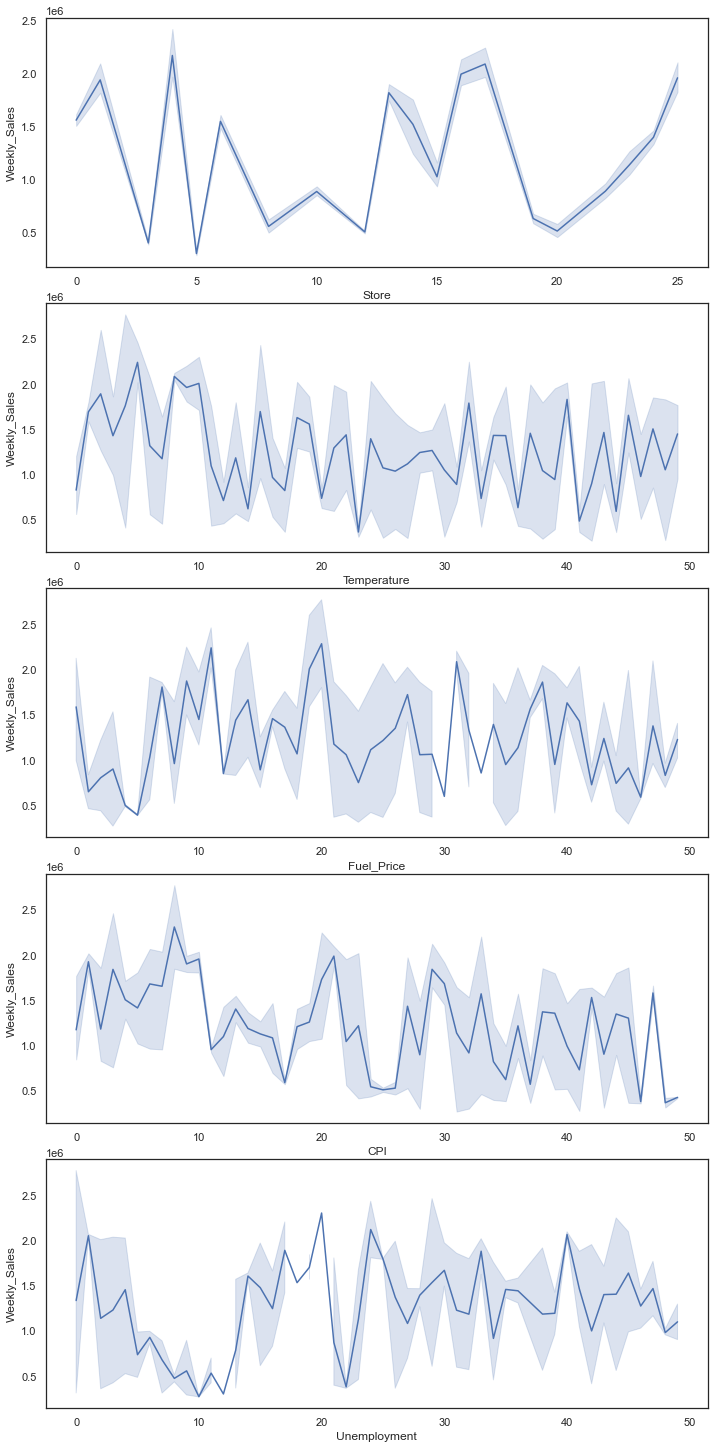

In [57]:
# Analyse univariée :tracé de la variable à prédire en focntion des variables 
from plotly.subplots import make_subplots
cols = ['Store', 'Temperature','Fuel_Price', 'CPI', 'Unemployment']
fig, ax = plt.subplots(len(cols),1,figsize= (10,20))
#ax=ax.reshape(-1)
fig.tight_layout()
for idx,col in enumerate(cols):
    
    bins=pd.qcut(dataset[col], q=50, labels=False, duplicates="drop")
    sns.lineplot(data=dataset,x=bins,y="Weekly_Sales",ax=ax[idx])

In [58]:
# Exclusion des valeurs nulles pour Date et Holiday_flag et exclusion des outliers pour les autres variables

col_out = ["Temperature","Fuel_Price","CPI","Unemployment"]
mask = (~dataset['Date'].isnull())&(~dataset['Holiday_Flag'].isnull())

for col in col_out:
    mean = desc.loc["mean",col]
    std = desc.loc["std",col]
    cond = (mean-3*std < dataset[col]) & (mean+3*std > dataset[col])
    mask = mask & cond
    
dataset_no_outlier = dataset.loc[mask,:]
dataset_no_outlier.describe(include='all')

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,71.000000,71,7.100000e+01,71.000000,71.000000,71.000000,71.000000,71.00000
unique,NaN,57,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,16-03-2012,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.985915,NaN,1.211318e+06,0.084507,59.709577,3.313662,178.792503,7.30707
std,6.255267,NaN,6.924102e+05,0.280126,17.160270,0.493802,39.546076,0.95294
min,1.000000,NaN,2.689290e+05,0.000000,18.790000,2.548000,126.139200,5.14300
25%,4.000000,NaN,5.262815e+05,0.000000,45.020000,2.815500,132.560127,6.54450
50%,8.000000,NaN,1.166118e+06,0.000000,60.710000,3.435000,196.919506,7.34800
75%,16.000000,NaN,1.827488e+06,0.000000,75.045000,3.742000,214.832191,8.09000


In [59]:
#Transformation de la colonne Date
date = pd.to_datetime(dataset["Date"])
#dataset_no_outlier["day"] = date.dt.day
dataset_no_outlier["month"] = date.dt.month
#dataset_no_outlier["year"] = date.dt.year
dataset_no_outlier["dayofweek"] = date.dt.dayofweek

dataset_no_outlier = dataset_no_outlier.drop(columns=['Date'])
#Création de X et Y

Y = dataset_no_outlier.loc[:,'Weekly_Sales']
X = dataset_no_outlier.loc[:,dataset_no_outlier.columns != 'Weekly_Sales']


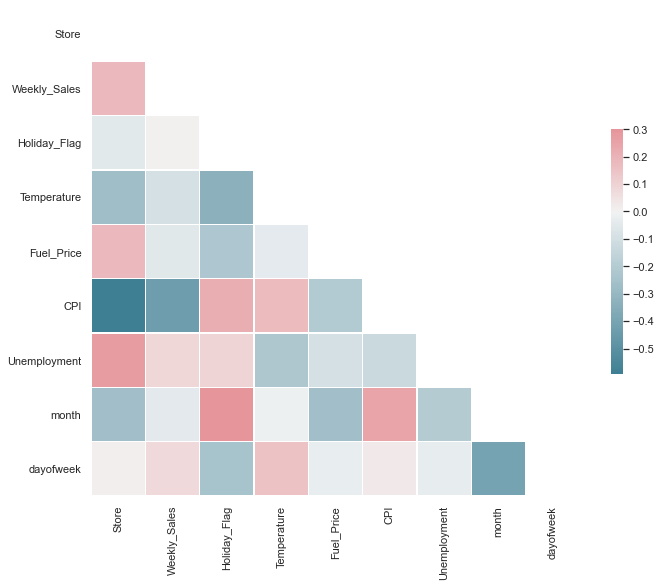

In [60]:
# Etude des corrélations
def plot_correlation_heatmap(df):
    corr = df.corr()
    
    sns.set(style="white")
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    f, ax = plt.subplots(figsize=(11, 9))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)


    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.show()
    
plot_correlation_heatmap(dataset_no_outlier)

In [61]:
# Visualize pairwise dependencies
fig = px.scatter_matrix(dataset_no_outlier);
fig.update_layout(
        title = go.layout.Title(text = "Bivariate analysis", x = 0.5), showlegend = False, 
            autosize=False, height=1500, width = 1200);


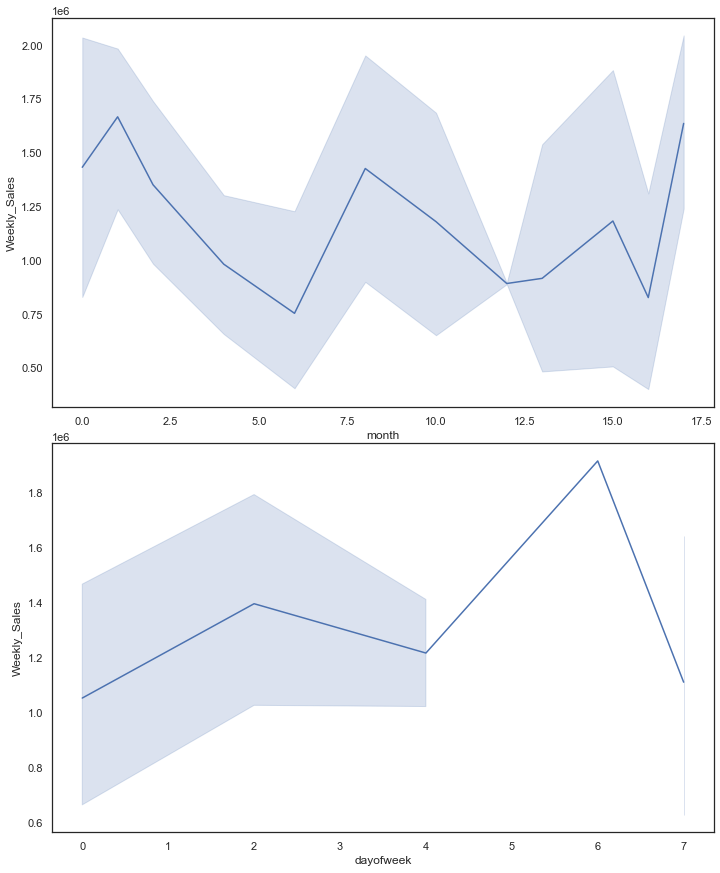

In [62]:
# Etude de la saisonalité des ventes
from plotly.subplots import make_subplots
cols = ['month', 'dayofweek']
fig, ax = plt.subplots(len(cols),1,figsize= (10,12))
#ax=ax.reshape(-1)
fig.tight_layout()
for idx,col in enumerate(cols):
    
    bins=pd.qcut(dataset_no_outlier[col], q=50, labels=False, duplicates="drop")
    sns.lineplot(data=dataset_no_outlier,x=bins,y="Weekly_Sales",ax=ax[idx])

In [63]:
# Etape nécessaire avant le pipeline
unique_val = []
for i in [0,1,6,7]:
    unique = np.sort(X.iloc[:,i].unique())
    unique_val.append(unique)

In [64]:
# First : always divide dataset into train set & test set !!
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Convert pandas DataFrames to numpy arrays before using scikit-learn

X_train = X_train.values
X_test = X_test.values
Y_train = Y_train.tolist()
Y_test = Y_test.tolist()

# Create pipeline for numeric features
# normalization
numeric_features = [2,3,4,5] 
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
# Create pipeline for categorical features
categorical_features = [0,1,6,7] 
categorical_transformer = Pipeline(
    steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), 
    ('encoder', OneHotEncoder(categories=unique_val,drop='first'))
    ])

In [65]:
# Encoding categorical features and standardizing numerical features

featureencoder = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),    
        ('num', numeric_transformer, numeric_features)
        ]
    )

X_train = featureencoder.fit_transform(X_train)
X_test = featureencoder.transform(X_test)


In [66]:
# Nom des colonnes après encodage
one_hot = featureencoder.transformers_[0][1]['encoder'].get_feature_names()

In [67]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [68]:
Y_train_pred = regressor.predict(X_train)
Y_test_pred = regressor.predict(X_test)

In [69]:
# Print R^2 scores
print("R2 score on training set : ", r2_score(Y_train, Y_train_pred))
print("R2 score on test set : ", r2_score(Y_test, Y_test_pred))

R2 score on training set :  0.9899879220729187
R2 score on test set :  0.7990082241100807


In [70]:
print("Cross validated R2 score on training set : ", cross_val_score(regressor,X_train, Y_train,cv=10).mean())
print("Variance of R2 score on training set : ", cross_val_score(regressor,X_train, Y_train,cv=10).std())

Cross validated R2 score on training set :  0.5011848285789948
Variance of R2 score on training set :  0.7218053020846069


In [71]:
coeff_columns = np.concatenate((one_hot,['Temperature', 'Fuel_Price', 'CPI',
       'Unemployment']))

In [72]:
# Etude des coefficients associés au modèle
coefs = pd.DataFrame(index =coeff_columns, data = regressor.coef_.transpose(), columns=["coefficients"])

print("Coefficients :")
display(coefs.sort_values(by="coefficients",ascending=False))

Coefficients :


,coefficients
x0_4.0,1.974741e+06
x0_13.0,1.882999e+06
x0_10.0,1.759887e+06
x0_19.0,1.210534e+06
x0_14.0,1.035368e+06
x0_18.0,8.598720e+05
CPI,7.543830e+05
x0_15.0,5.599809e+05
x0_17.0,4.062606e+05
x0_11.0,3.712815e+05


In [73]:
# Régularisation
ridge_regressor_small_alpha = Ridge(alpha = 0.15)
ridge_regressor_small_alpha.fit(X_train, Y_train)
print("Ridge with small Alpha score train: {}".format(ridge_regressor_small_alpha.score(X_train, Y_train)))
print("Ridge with small Alpha score test: {}".format(ridge_regressor_small_alpha.score(X_test, Y_test)))

Ridge with small Alpha score train: 0.9776322587250266
Ridge with small Alpha score test: 0.7998200868279394


In [74]:
# Grid search
params = {'alpha': np.arange(0,1,0.01)} # determine the range of parameters to try
ridge = Ridge() # create an instance of the model

grid = GridSearchCV(ridge, params, cv = 10, verbose = 1)
grid_fit = grid.fit(X_train, Y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    6.6s finished


In [75]:
print("Optimal value for alpha : ", grid_fit.best_params_)

Optimal value for alpha :  {'alpha': 0.08}


In [76]:
print('Test score for the best model : ', grid_fit.best_estimator_.score(X_test,Y_test))

Test score for the best model :  0.8423844231288131


In [77]:
scores = cross_val_score(grid_fit.best_estimator_, X_train, Y_train, cv = 10)

print('The cross-validated R2-score is : ', scores.mean())
print('The standard deviation is : ', scores.std())

The cross-validated R2-score is :  0.6656213410408351
The standard deviation is :  0.33514903444531885


In [78]:
# Régularisation Lasso
lasso1 = Lasso(alpha = 0.1)
lasso1.fit(X_train, Y_train)
print("Lasso score : {}".format(lasso1.score(X_train, Y_train)))
print("Lasso score of test: {}".format(lasso1.score(X_test, Y_test)))

Lasso score : 0.9897860887646792
Lasso score of test: 0.8184675727032418


In [79]:
# Grid search
params = {'alpha': np.arange(0,1,0.01)} # determine the range of parameters to try
lasso = Lasso() # create an instance of the model

grid = GridSearchCV(lasso, params, cv = 10, verbose = 1)
grid_fit = grid.fit(X_train, Y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   15.5s finished


In [80]:
print("Optimal value for alpha : ", grid_fit.best_params_)

Optimal value for alpha :  {'alpha': 0.99}


In [81]:
print('Test score for the best model : ', grid_fit.best_estimator_.score(X_test,Y_test))
scores = cross_val_score(grid_fit.best_estimator_, X_train, Y_train, cv = 10)

print('The cross-validated R2-score is : ', scores.mean())
print('The standard deviation is : ', scores.std())

Test score for the best model :  0.8188875858294303
The cross-validated R2-score is :  0.6001978809857416
The standard deviation is :  0.7049435321549357
